**Problem Statement**    
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

# Explore the Data 

In [2]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Preprocessing the Data

## Transform Object Data

In [7]:
encoder = LabelEncoder()

In [8]:
data.Gender = encoder.fit_transform(data.Gender)

# Model 

In [9]:
n_clusters= []
inertia = []

In [10]:
for i in range (1,12): 
    model = KMeans(n_clusters = i)
    model.fit(data)
    n_clusters.append(i)
    inertia.append(model.inertia_)

In [11]:
pd.DataFrame(n_clusters , inertia )

,0
975512.060000,1
387065.713771,2
271384.508783,3
195393.503846,4
157179.693358,5
122630.441753,6
103325.560420,7
86053.674448,8
77296.251655,9
69292.622071,10


Text(0, 0.5, '% of Error')

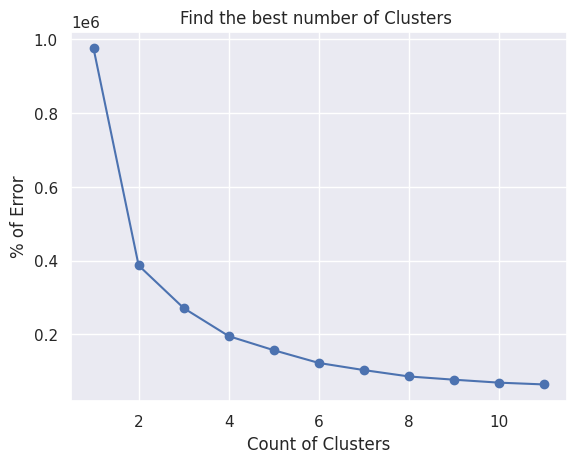

In [12]:
plt.plot(n_clusters, inertia,marker = 'o')
plt.title("Find the best number of Clusters ")
plt.xlabel("Count of Clusters")
plt.ylabel("% of Error")


In [13]:
model = KMeans(n_clusters = 4)
model.fit(data)

KMeans(n_clusters=4)

In [14]:
model.inertia_

195401.19855991466

In [15]:
predict = model.predict(data)

In [16]:
data['Groups'] = predict 

In [17]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Groups
101,102,0,49,62,48,2
67,68,0,68,48,48,2
197,198,1,32,126,74,0
79,80,0,49,54,42,2
153,154,0,38,78,76,0


In [18]:
group_1 = data[data.Groups== 0]
group_2 = data[data.Groups== 1]
group_3 = data[data.Groups== 2]
group_4 = data[data.Groups== 3]

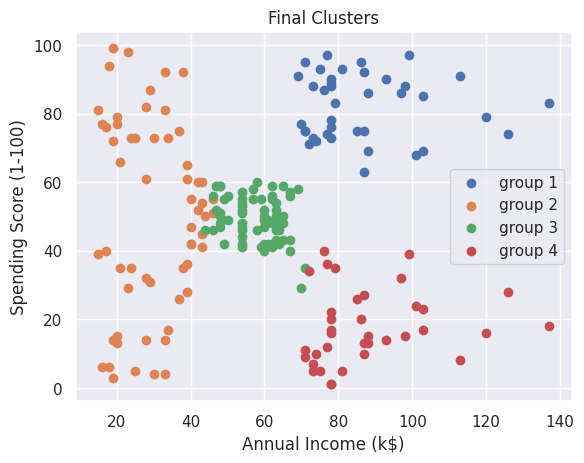

In [19]:
plt.scatter(group_1['Annual Income (k$)'],group_1['Spending Score (1-100)'] ,label= 'group 1')
plt.scatter(group_2['Annual Income (k$)'],group_2['Spending Score (1-100)'] ,label= 'group 2')
plt.scatter(group_3['Annual Income (k$)'],group_3['Spending Score (1-100)'] ,label= 'group 3')
plt.scatter(group_4['Annual Income (k$)'],group_4['Spending Score (1-100)'] ,label= 'group 4')
plt.title('Final Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Analyze the Data

<Axes: xlabel='Groups', ylabel='count'>

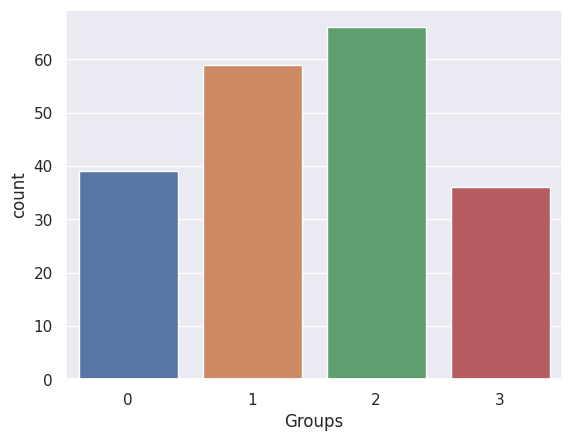

In [20]:
sns.countplot(x= data.Groups)


<Axes: ylabel='count'>

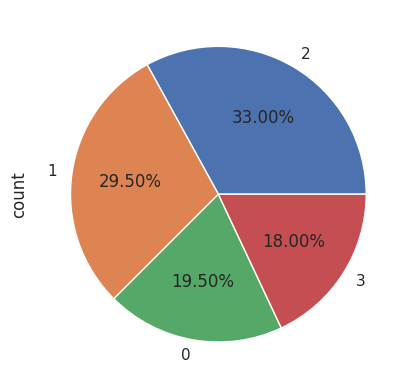

In [21]:
data.Groups.value_counts().plot.pie(autopct= '%0.2f%%')

<Axes: xlabel='Groups', ylabel='Spending Score (1-100)'>

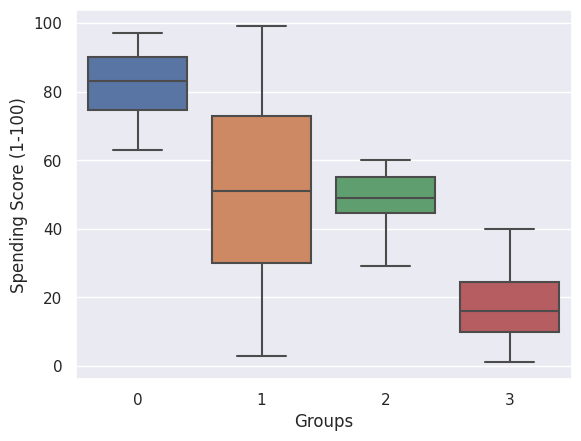

In [22]:
sns.boxplot(x= data['Groups'], y=data['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Count'>

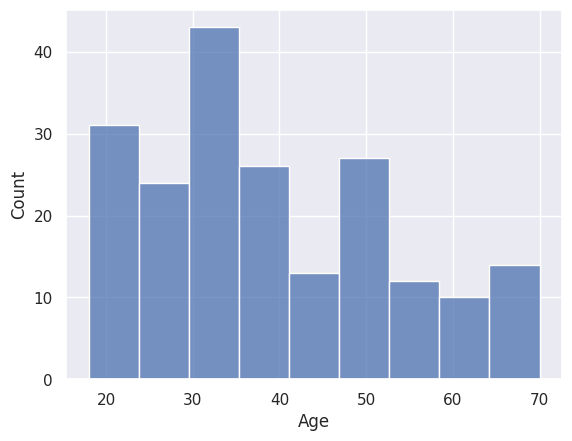

In [23]:
sns.histplot(data.Age)

<Axes: xlabel='Gender', ylabel='count'>

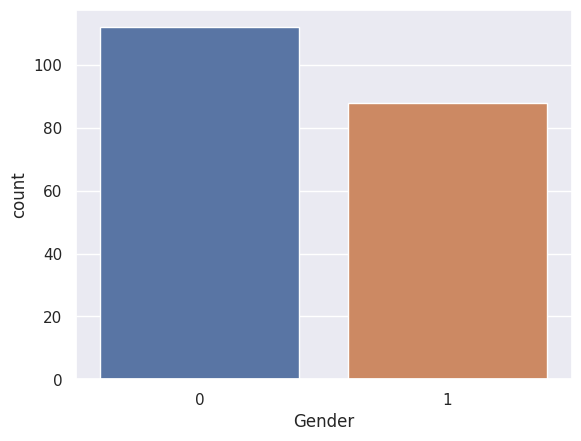

In [24]:
sns.countplot(x= data.Gender)

<Axes: xlabel='Groups', ylabel='count'>

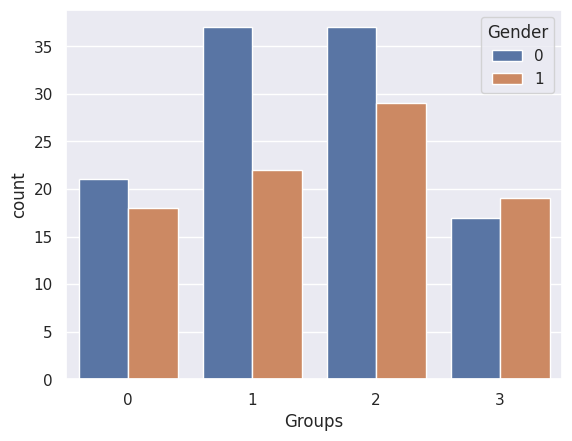

In [25]:
sns.countplot(x= data.Groups, hue= data.Gender)